In [1]:
#matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_combined_df = pd.merge(ride_data_df, city_data_df, on = "city", how = "left")

# Display the data table for preview
pyber_combined_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types
#y axis is average fare (need to calculate average fare by type)
city_grby = pyber_combined_df.groupby(['city','type'])
print(city_grby)
city_grby_df = pd.DataFrame(city_grby.mean())
city_grby_df = city_grby_df.reset_index(['type'])

#calculate avg fare per type
urban_df = city_grby_df[city_grby_df.type == "Urban"]
urban_fare = []
urban_fare.append(urban_df['fare'].values)

suburban_df = city_grby_df[city_grby_df.type == "Suburban"]
suburban_fare = []
suburban_fare.append(suburban_df['fare'].values)

rural_df = city_grby_df[city_grby_df.type == "Rural"]
rural_fare = []
rural_fare.append(rural_df['fare'].values)

#calculate total rides per city by type
count_rides_df = pd.DataFrame(city_grby.count())
count_rides_df = count_rides_df.reset_index(['type'])
count_rides_df.head()

urban_ride_count = count_rides_df[count_rides_df.type == "Urban"]
urban_count = []
urban_count.append(urban_ride_count['ride_id'].values)

suburban_ride_count = count_rides_df[count_rides_df.type == "Suburban"]
suburban_count = []
suburban_count.append(suburban_ride_count['ride_id'].values)

rural_ride_count = count_rides_df[count_rides_df.type == "Rural"]
rural_count = []
rural_count.append(rural_ride_count['ride_id'].values)

In [3]:
#print(type_grouped['driver_count'].sum())
city_df_grouped = city_data_df.groupby(['city'])
print(city_df_grouped)
city_df_grouped.head()

city_df_grouped = pd.DataFrame(city_data_df)

urban_city_df = city_df_grouped[city_df_grouped.type =="Urban"]
urban_driver = []
urban_driver.append(urban_city_df['driver_count'].values*10)

suburban_city_df = city_df_grouped[city_df_grouped.type == "Suburban"]
suburban_driver = []
suburban_driver.append(suburban_city_df['driver_count'].values*10)

rural_city_df =city_df_grouped[city_df_grouped.type == "Rural"]
rural_driver = []
rural_driver.append(rural_city_df['driver_count'].values*10)


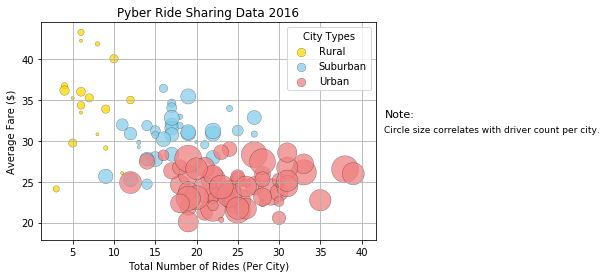

In [4]:
# Build the scatter plots for each city types
Rural = plt.scatter(rural_count, rural_fare, marker = "o", facecolors = "gold", edgecolors = "black", 
                    linewidths = .25, alpha = .75, s=rural_driver)
Suburban = plt.scatter(suburban_count, suburban_fare, marker = "o", facecolors = "skyblue", edgecolors = "black",
                       linewidths = .25, alpha = .75, s = suburban_driver)
Urban = plt.scatter(urban_count, urban_fare, marker = "o", facecolors = "lightcoral", edgecolors = "black",
                    linewidths = .25, alpha = .75, s = urban_driver)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
legend = plt.legend ((Rural, Suburban, Urban),
                     ('Rural', 'Suburban', 'Urban'),
                     title = "City Types",
                     scatterpoints = 1,
                     loc = 'upper right')

legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]

# Incorporate a text label regarding circle size
plt.gcf().text(0.92, 0.55, "Note:", fontsize = 11)
plt.gcf().text(0.92, 0.5, "Circle size correlates with driver count per city.", fontsize = 9)

# Save Figure

plt.savefig("Images/Pyber_Bubble_Plot.png")

##### Show plot
plt.show()

## Total Fares by City Type

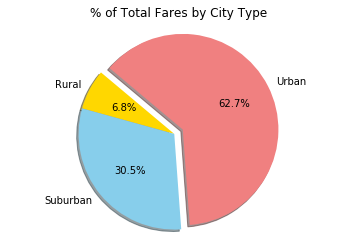

In [8]:
#find percents by type
grby_type = pyber_combined_df.groupby(['type'])
print(grby_type)

grby_type_df = pd.DataFrame(grby_type.sum())
grby_type_df

labels = grby_type_df.index
labels


# The colors of each section of the pie chart
colors = ["gold", "skyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0,0,.1)


# Tell matplotlib to create a pie chart based upon the above data
plt.pie(grby_type_df["fare"], explode = explode, labels= labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.title("% of Total Fares by City Type")

plt.savefig("Images/Total_Fares_Pie.png")

## Total Rides by City Type

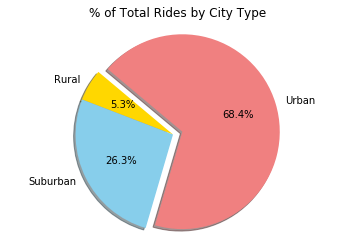

In [6]:
# Calculate Ride Percents
grby_type_count_df = grby_type.count()

# Build Pie Chart
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(grby_type_count_df['ride_id'], explode = explode, labels= labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Images/Total_Rides_Pie.png")

## Total Drivers by City Type

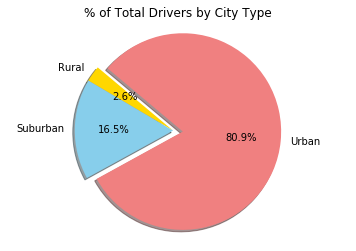

In [7]:
# Calculate Ride Percents
driver_df = city_data_df.groupby(['type'])

print(driver_df)

driver_df = (driver_df['driver_count'].sum())
driver_df
# Build Pie Chart
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(driver_df, explode = explode, labels= labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.title("% of Total Drivers by City Type")

plt.savefig("Images/Total_Drivers_Pie.png")